## Punto 1

Generamos una variable diccionario con los datos de entrada para la cercha sugerida

In [2]:
import numpy as np

data = {
    "nodes": np.array([
        [0.0,0.0],
        [2.0,0.0],
        [4.0,0.0],
        [6.0,0.0],
        [8.0,0.0],
        [10.0,0.0],
        [12.0,0.0],
        [2.0,1.0],
        [4.0,2.0],
        [6.0,3.0],
        [8.0,2.0],
        [10.0,1.0]]), 
    
    "cons": np.array([
        [-1, -1],
        [0,0],
        [0,0],
        [0,0],
        [0,0],
        [0,0],
        [0,-1],
        [0,0],
        [0,0],
        [0,0],
        [0,0],
        [0,0]], dtype=int),
    
    "elements": np.array([
        [0, 0, 1],
        [0, 1, 2],
        [0, 2, 3],
        [0, 3, 4],
        [0, 4, 5],
        [0, 5, 6],
        [0, 0, 7],
        [0, 7, 8],
        [0, 8, 9],
        [0, 9, 10],
        [0, 10, 11],
        [0, 11, 6],
        [0, 1, 7],
        [0, 7, 2],
        [0, 2, 8],
        [0, 8, 3],
        [0, 3, 9],
        [0, 3, 10],
        [0, 10, 4],
        [0, 4, 11],
        [0, 11, 5]]), 
    
    "mats": np.array([[2.07e11, 0.01]]), 
    
    "loads": np.array([
        [0, (-10000/7)+5000],
        [0,0],
        [0,0],
        [0,0],
        [0,0],
        [0,0],
        [0, (-10000/7)+5000],
        [0, -10000/7],
        [0, -10000/7],
        [0, -10000/7],
        [0, -10000/7],
        [0, -10000/7]]), 
    
    "densidades": np.array([[7800]],dtype=int)
}


 Postoriormente, definimos la función `calcular esfuerzos` como:

 ```python
def calcular_esfuerzos(coordenadas_nodos, elements, mats, desp):
    
    esfuerzos = []
    
    coord_deformadas = coordenadas_nodos + desp
    
    for ele in elements:
        nodo_inicial, nodo_final = ele[1], ele[2]
        coordenada_inicial = coordenadas_nodos[nodo_inicial]
        coordenada_final = coordenadas_nodos[nodo_final]
        
        longitud_inicial = np.linalg.norm(coordenada_final - coordenada_inicial)
        
        modulo_de_young, area_transversal = mats[ele[0]]
        
        coordenada_desp_inicial = coord_deformadas[nodo_inicial]
        coordenada_desp_final = coord_deformadas[nodo_final]
        
        longitud_final = round(np.linalg.norm(coordenada_desp_final - coordenada_desp_inicial),2)
        
            
        elongacion =longitud_final - longitud_inicial
        
        
        esfuerzo = round((modulo_de_young * elongacion) / longitud_inicial,2)
        esfuerzos.append(esfuerzo)
    
    return esfuerzos

```

Una vez definida, la importamos para utilizarla con los parámetros `coords`, `elements` y `mats`. Estos datos pertenecian a una variable de tipo diccionario, por lo que fueron llamados de la siguiente forma:

```python
coords = data["nodes"]
elements = data["elements"]
mats = data["mats"]
```
Para definir el parametro `desp` utilizamos la función `análysis`, la cual fue proporcionada con la tarea. Además, definimos las coordenadas finales sumando las coordenas iniciales con los desplazamientos generados por la función analysis 

```python
coord_deformadas = coords + desp
```

In [3]:
from importlib import reload
import plane_trusses
reload(plane_trusses)
from plane_trusses import analysis
import Funciones_2
reload(Funciones_2)
from Funciones_2 import calcular_esfuerzos


desp = analysis(data, verbose=False)
coords = data["nodes"]
elements = data["elements"]
mats = data["mats"]
cons = data ["cons"]
loads = data ["loads"]
densidades = data ["densidades"]
coord_deformadas = coords + desp

esfuerzos = calcular_esfuerzos(coords, elements, mats, desp)

for indice, esfuerzo in enumerate(esfuerzos):
    print(f"El esfuerzo de la barra #{indice + 1 } es: {esfuerzo}")

El esfuerzo de la barra #1 es: 714408.7102894936
El esfuerzo de la barra #2 es: 714294.2781097617
El esfuerzo de la barra #3 es: 571428.6693765392
El esfuerzo de la barra #4 es: 571428.6692846126
El esfuerzo de la barra #5 es: 714294.2782476513
El esfuerzo de la barra #6 es: 714408.7102435303
El esfuerzo de la barra #7 es: -798486.0891525269
El esfuerzo de la barra #8 es: -638871.1875888252
El esfuerzo de la barra #9 es: -479157.0461581171
El esfuerzo de la barra #10 es: -479157.0461581171
El esfuerzo de la barra #11 es: -638871.1875477144
El esfuerzo de la barra #12 es: -798486.0891936376
El esfuerzo de la barra #13 es: 33.26097197664524
El esfuerzo de la barra #14 es: -159709.83557134296
El esfuerzo de la barra #15 es: 71432.33515094494
El esfuerzo de la barra #16 es: -202029.96435774217
El esfuerzo de la barra #17 es: 285714.2857144446
El esfuerzo de la barra #18 es: -202029.96435774217
El esfuerzo de la barra #19 es: 71432.33515094494
El esfuerzo de la barra #20 es: -159709.8354891

## Punto 2

Se importó la función lectura del documento funciones_2, definida como:
 
 ```python

def graficar(coordenadas_nodos, elements, desp=None):
    # Extrae las conexiones entre nodos de la matriz 'elements'
    conect = elements[:, 1:]
    conexiones_nodos = [(int(a), int(b)) for a, b in conect]

    # Crea una figura para la gráfica
    plt.figure(figsize=(12, 4))

    # Itera a través de las conexiones entre nodos y graficarlas en azul
    for conect in conexiones_nodos:
        nodo1, nodo2 = conect
        x1, y1 = coordenadas_nodos[nodo1]
        x2, y2 = coordenadas_nodos[nodo2]
        plt.plot([x1, x2], [y1, y2], "-b", marker='o')
        plt.title("Estado Original (Azul)")  # Establecer un título
        plt.axis("image")  # Ajustar el aspecto de la gráfica

    # Comprueba si se deben graficar las deformaciones
    if desp is None:
        print("No se pidió graficar deformaciones")
    else:
        # Calcula las coordenadas de los nodos deformados
        coord_deformadas = (coordenadas_nodos + desp * 10000)

        # Itera a través de las conexiones entre nodos y graficarlas en rojo (deformadas)
        for conect in conexiones_nodos:
                     
```

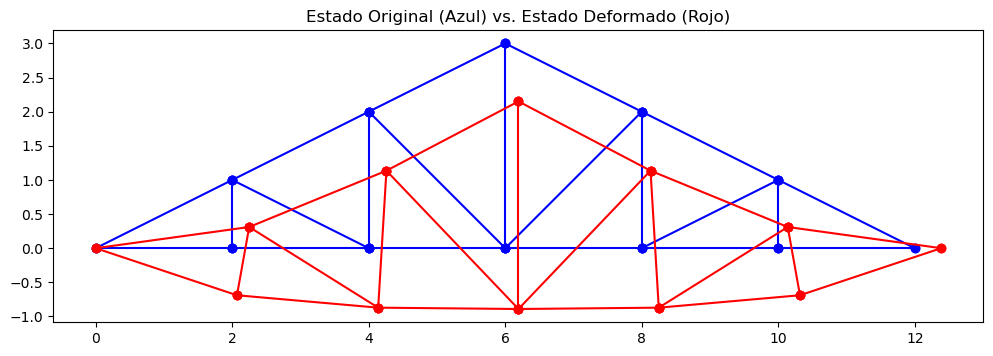

In [4]:
from importlib import reload
import Funciones_2
reload(Funciones_2)
from Funciones_2 import graficar

graficar(coords, elements, desp = desp)

La gráfica resultante de este código es una representación visual de un sistema estructural en dos estados diferentes. En azul, se muestra el estado original de la estructura, y en rojo se representa el estado deformado, teniendo en cuenta los desplazamientos.

## Punto 3

Para mostrar cómo los esfuerzos deforman la figura importamos la función `vis_esfuerzos`, la cual esta definida como:

 ```python
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import Normalize

# Definir la función vis_esfuerzos
def vis_esfuerzos(coordenadas_nodos, elements, resultados_esfuerzos, desp=None):
    # Extraer la informacióndatos de la cerchalementos
    conect = elements[:, 1:]
    nodes = coordenadas_nodos

  el  Definir un mapa anco a rojo)
    sismic1_cmap = LinearSegmentedColormap.from_list("sismic1", [(0.0, "blue"), (0.5, "white"), (1.0, "red")]

    # Calcular el esfuerzo máximo en los resultados
    Esfuerzo_max = np.max(np.abs(resultados_esfuerzhallar la magnitud de
    # Normalizar los esfuerzos para mapearlos a colores
    norm = Normalize(vmin=-Esfuerzo_max, vmax=Esfuerzolax)

  de la cercha   # Crear una figura de matplotlib
    fig = plt.figure(ficiclo para graficar cada nodo(conexiones entre nodos)
    for i, (nodo1, nodo2) in enumerate(conect):
        x1, y1 = coordenadas_nodos[nodo1]
        x2, y2 = coordenadas_nodos[nodo2]
        esfuerzo = resultados_esfuerzos[i]

        # Asignar un color a la línea según el esfuerzo
        color = sismic1_cmap(norm(esfuerzo))
        
        # Dibujar la línea que representa el esfuerzo
        plt.plot([x1, x2], [y1, y2], color=color, linewidth=2)

    # Asegurarse de que los ejes sean iguales (aspecto igual)
    plt.gca().set_aspegraficar laprobar si se según el parametro ropociona información de deformación (desp)
    if desp is None:
        print("No se pidió gráfica de deformaciones")
    de la cercha original con los esfuerzos   else:
        # Borrar la figura anla cercha original en      p    # Dibujar las líneas grises sin deformación
        for i, (nodo1, nodo2) in enumerate(conect):
            x1, y1 = coordenadas_nodos[nodo1]
            x2, y2 = coordenadas_nodos[nodo2]
            esfuerzo = resultados_esfuerzos[i]
            plt.plot([x1, x2], [y1, y2], color='grey', linewidth=1)

        # Calcular las coordenadas deformadas aplicando desplazamientos (desp)
        coords_deformadas = coordenadas_nodos + (desp * 10000)

        # Iterar a través de los elementos nuevamente y dibujar con deformaciones
        for i, conect in enumerate(conect):
            nodo1, nodo2 = conect
            x3, y3 = coords_deformadas[nodo1]
            x4, y4 = coords_deformadas[nodo2]
            esfuerzo = resultados_esfuerzos[i]
            color = sismic1_cmap(norm(esfuerzo))
            plt.plot([x3, x4], [y3, y4], color=color, linewidth=3)

    # Crear una barra de color para representar los valores de esfuerzo
    sm = plt.cm.ScalarMappable(cmap=sismic1_cmap, norm=norm)
    sm.set_array([])
    colorbar_ax = plt.figure().add_axes([0.85, 0.1, 0.03, 0.8])  # Definir la ubicación de la barra de color
    plt.colorbar(sm, cax=colorbar_ax, label="esfuerzos")  # Agregar una etiqueta a la barra de color
    ax = plt.gca()
    ax.set_facecolor("m")  # Establecer el fondo del gráfico en magenta
    plt.show()  # Mostrar la figura

```

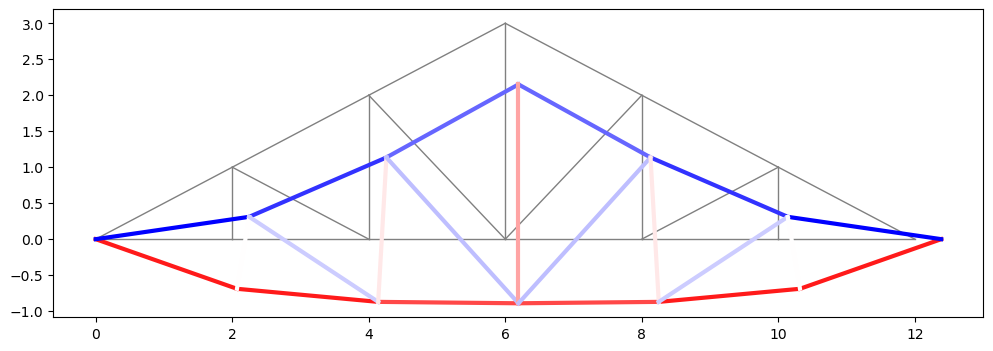

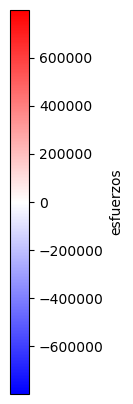

In [5]:
from importlib import reload
import Funciones_2
reload(Funciones_2)
from Funciones_2 import vis_esfuerzos

vis_esfuerzos(coords, elements, esfuerzos, desp = desp)

En esta gráfica se pueden observar las deformaciones que presenta cada barra, además demuestra con la escala de colores, la magnitud del esfuerzo a lo que está sometida la barra

## Punto 4

Para calcular el peso soportado por cada nodo se importo la función ` calc_peso`, definida como:

```python
# Definir la función calc_peso
def calc_peso(nodes, elements, mats, densidades):
    # Extraer información sobre las secciones, el número de nodos y las conexiones entre elementos
    secciones = mats[:, 1:]
    num_nodes = len(nodes)
    conect = elements[:, 1:]
    
    # Crear un array para almacenar las cargas verticales en los nodos
    carga_vertical = np.zeros(num_nodes)
    
    # Iterar a través de los elementos
    for i in range(len(conect)):
        # Obtener los nodos inicial y final del elemento
        nodo_inicial, nodo_final = conect[i]
        
        # Suponemos que se utilizará la primera sección y densidad en la lista (índice 0)
        seccion = secciones[0]
        densidad = densidades[0]
        
        # Obtener las coordenadas de los nodos inicial y final
        x1, y1 = nodes[nodo_inicial]
        x2, y2 = nodes[nodo_final]
        
        # Calcular la longitud del elemento
        longitud = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
        
        # Calcular el peso del elemento debido a su longitud y densidad
        peso_elemento = 0.5 * longitud * seccion * densidad * 9.81
        
        # Distribuir la carga vertical en los nodos inicial y final del elemento
        carga_vertical[nodo_inicial] += peso_elemento
        carga_vertical[nodo_final] += peso_elemento
    
    # Devolver el array de cargas verticales en los nodos
    return carga_vertical


```

In [6]:
from importlib import reload
import Funciones_2
reload(Funciones_2)
from Funciones_2 import calc_peso

peso = calc_peso(coords, elements, mats, densidades)


print(peso)

[1532.47803399 2298.04       3064.83803399 3832.22842712 3064.83803399
 2298.04       1532.47803399 3064.57410197 3065.37028154 2299.27606798
 3065.37028154 3064.57410197]


## Preguntas de análisis

Presente la configuración deformada así como la distribución de esfuerzos en la estructura.

   R\\ esto fue mostrado anteriormente en el numeral 3

In [7]:
cargas_2 = loads.copy()
cargas_2[:,1] += peso

2. Considere el efecto del peso en la estructura asumiendo una densidad de 7800 kg/m3 y repita el punto anterior


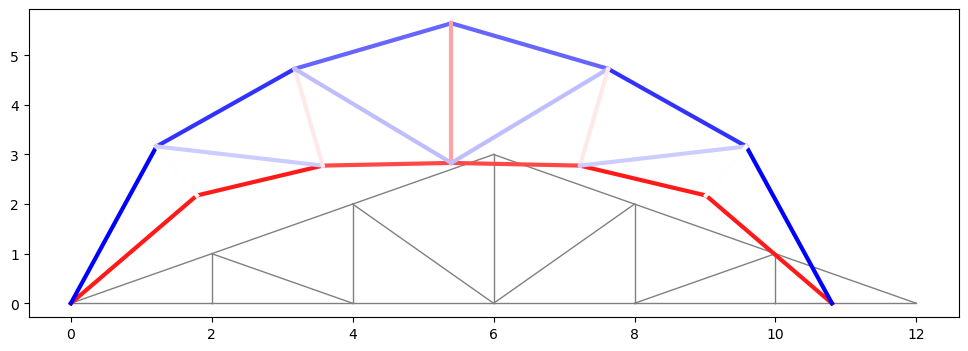

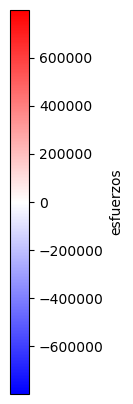

In [8]:
print ("2. Considere el efecto del peso en la estructura asumiendo una densidad de 7800 kg/m3 y repita el punto anterior")

datos_2 = {
    "nodes": coords,
    "cons": cons,
    "elements": elements, 
    "loads": cargas_2,
    "mats": mats}

desp_2 = analysis(datos_2, verbose=False)
esfuerzos_2 = calcular_esfuerzos(coords, elements, mats, desp_2)
vis_esfuerzos(coords, elements, esfuerzos, desp = desp_2)


¿Qué pasa si se cambio el apoyo de la derecha por un empotramiento?

    R\\ Al cambiar un apoyo de rodillo por un empotramiento en una cercha, las deformaciones de la cercha se verán afectadas principalmente en el punto de empotramiento. Con el empotramiento, la cercha no podrá tener desplazamientos Horizontales en ese punto, lo que resultará en una mayor rigidez y, por lo tanto, en menores deformaciones Horizontales en comparación con un apoyo de rodillo que permitiría cierta expansión o contracción Horizontal. Esto podría influir en la distribución de cargas y esfuerzos en la cercha en relación con su configuración original con el apoyo de patín.
   

¿Cómo cambia la respuesta de la estructura si se cambia la forma en la que se distribuye la carga total en la parte superior?

    R\\ La distribución de la carga en la parte superior de una estructura puede afectar su respuesta de diversas maneras. Concentrar la carga puede resultar en tensiones elevadas en áreas específicas, aumentando el riesgo de deformaciones locales o fallos. Una distribución uniforme disminuye las concentraciones de esfuerzos, haciendo que la estructura sea más estable, mientras que una distribución asimétrica puede generar momentos torsionales y esfuerzos desiguales. Cambiar el punto de aplicación de la carga puede alterar la respuesta de la estructura, y las cargas dinámicas, como el viento o los sismos, también tienen un impacto significativo.


¿Cómo cambia la respuesta de la estructura si los elementos diagonales se invierten respecto al centro de simetría?

    R\\ La inversión de los elementos diagonales en una estructura, especialmente en las barras centrales de una viga, puede modificar la distribución de cargas, lo que a su vez impacta la respuesta y estabilidad de la estructura. Este cambio puede provocar redistribuciones de tensiones y deformaciones, afectar la capacidad de carga, y debilitar o fortalecer la estabilidad. Además, en el contexto de cargas sísmicas, la inversión de elementos diagonales puede influir en el comportamiento sísmico de la estructura. Por lo tanto, cualquier modificación en la disposición de los elementos diagonales debe ser cuidadosamente considerada y evaluada en el diseño y análisis estructural.